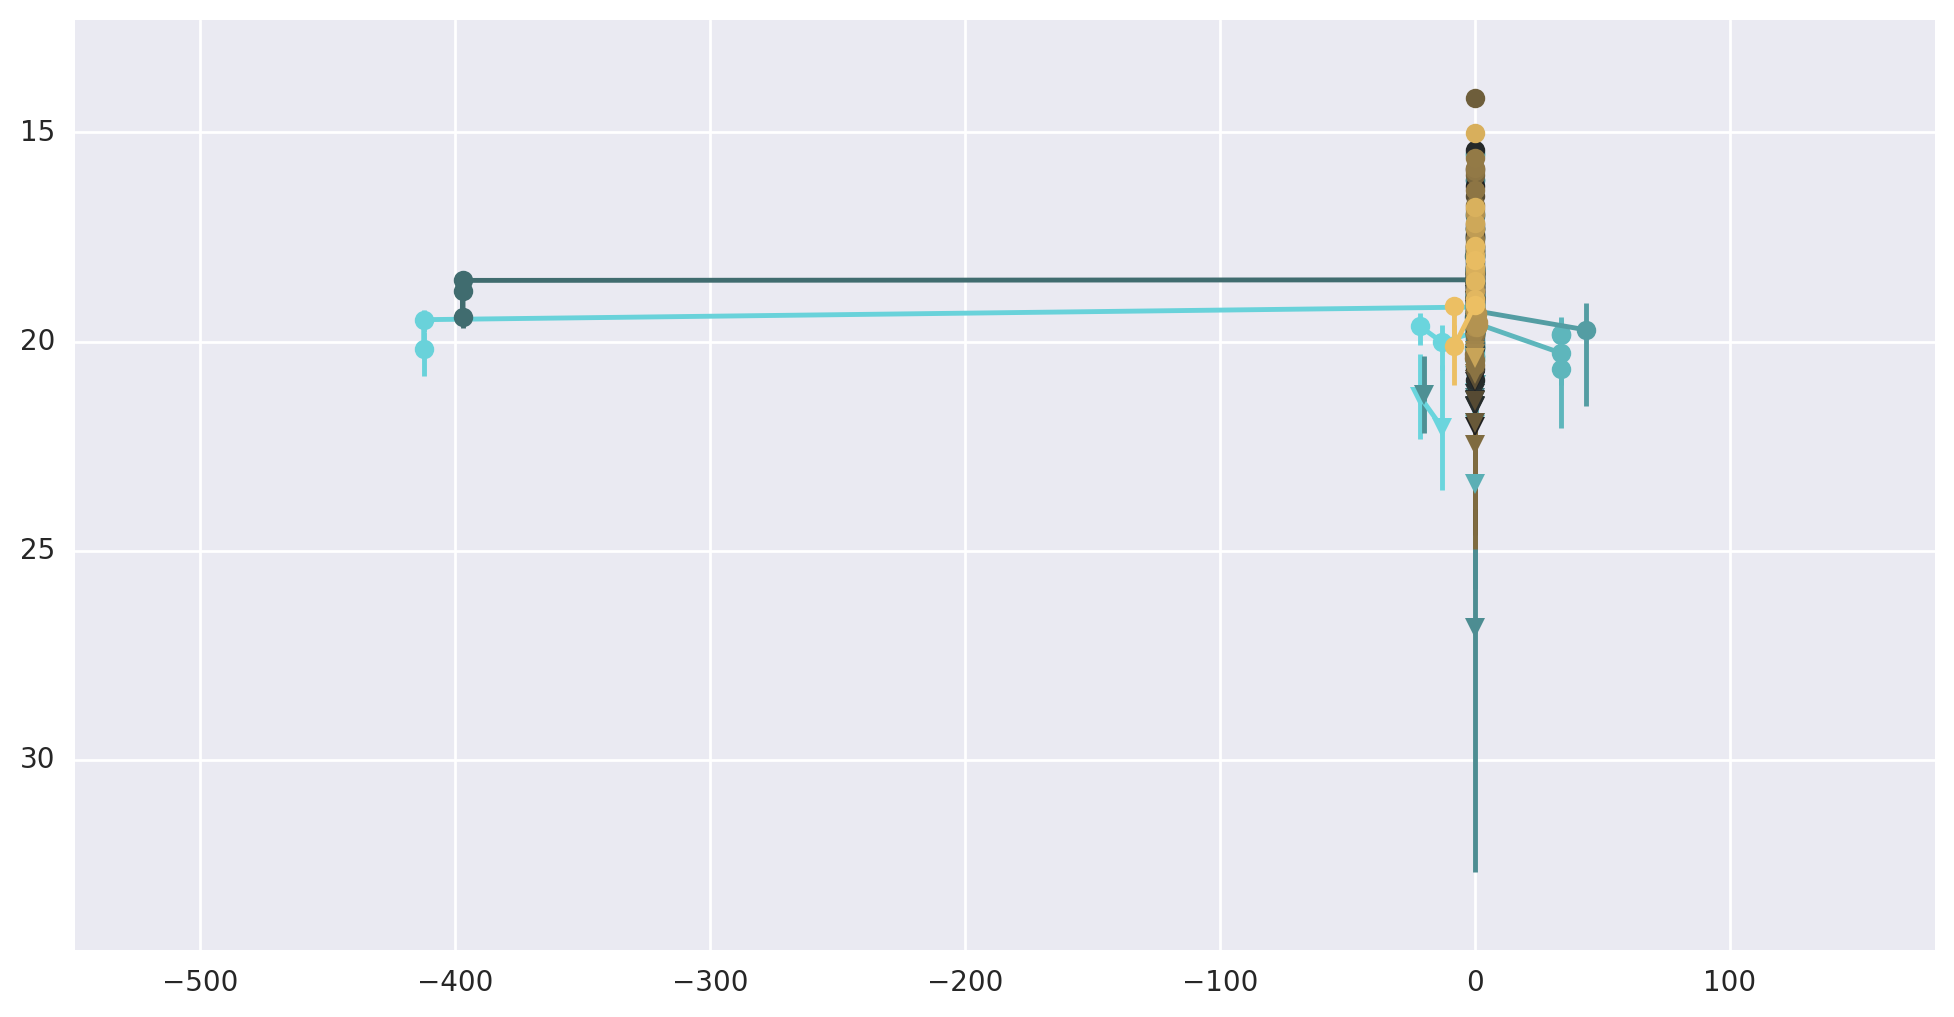

In [101]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.colors import rgb2hex
import seaborn as sns
from astropy.time import Time as astrotime
from math import isnan

pal = sns.diverging_palette(200, 60, l=80, as_cmap=True, center="dark")

with open('gdict.json', 'r') as f:
    data = json.loads(f.read())

fig = plt.figure(figsize=(12,6))
for di, dat in enumerate(data):
    frac = float(di) / float(len(data))
    flags = np.array(dat['flags'])
    good = flags == 0.0
    
    times = np.array([astrotime(x, format='unix').mjd for x in np.array(dat['t_mean']) + 315964800])[good]
    mags = np.array(dat['mag_mcatbgsub'])[good]
    if not len(mags):
        continue
    maxi = np.argmin(mags)
    maxt = times[maxi]

    meas = np.array([not isnan(x) for x in np.array(dat['mag_mcatbgsub_err_2'])[good]])
    if len(meas):
        times = np.array([astrotime(x, format='unix').mjd for x in np.array(dat['t_mean']) + 315964800])[good][meas] - maxt
        mags = np.array(dat['mag_mcatbgsub'])[good][meas]
        yerrs = (np.array(dat['mag_mcatbgsub_err_1'])[good][meas], np.array(dat['mag_mcatbgsub_err_2'])[good][meas])
        plt.errorbar(times, mags, yerr=yerrs, marker='o', c=rgb2hex(pal(frac)), label=dat['name'])

    upp = np.array([isnan(x) for x in np.array(dat['mag_mcatbgsub_err_2'])[good]])
    if len(upp):
        times = np.array([astrotime(x, format='unix').mjd for x in np.array(dat['t_mean']) + 315964800])[good][upp] - maxt
        mags = np.array(dat['mag_mcatbgsub'])[good][upp]
        yerrs = np.array(dat['mag_mcatbgsub_err_1'])[good][upp]
        plt.errorbar(times, mags, yerr=yerrs, marker='v', c=rgb2hex(pal(frac)))
plt.gca().invert_yaxis()
plt.margins(0.3,0.1)
# plt.legend(prop={'size':6})
plt.show()